In [18]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
plotting.setup_mpl()
ff1.Cache.enable_cache('cache/')
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
pio.templates.default = "plotly_dark"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
year = 2022
gp_round = 7
ses = 'FP3'
driver_1 = 'LEC'
driver_2 = 'GAS'

In [20]:
events_list = ff1.get_event_schedule(2022)[2:]

session = ff1.get_session(year, gp_round, ses)
session.load(weather=True, telemetry=True)

core           INFO 	Loading data for Monaco Grand Prix - Practice 3 [v2.2.8]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching trac

In [21]:
events_list

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY E DELL'EMILIA-ROMAGNA 2022,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,18,Japan,Suzuka,FORMULA 1 JAPANESE GRAND PRIX 2022,2022-10-09 16:00:00,Japanese Grand Prix,conventional,Practice 1,2022-10-07 13:00:00,Practice 2,2022-10-07 16:00:00,Practice 3,2022-10-08 13:00:00,Qualifying,2022-10-08 16:00:00,Race,2022-10-09 14:00:00,True
20,19,United States,Austin,FORMULA 1 ARAMCO UNITED STATES GRAND PRIX 2022,2022-10-23 16:00:00,United States Grand Prix,conventional,Practice 1,2022-10-21 14:00:00,Practice 2,2022-10-21 17:00:00,Practice 3,2022-10-22 14:00:00,Qualifying,2022-10-22 17:00:00,Race,2022-10-23 14:00:00,True
21,20,Mexico,Mexico City,FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2022,2022-10-30 16:00:00,Mexico City Grand Prix,conventional,Practice 1,2022-10-28 13:00:00,Practice 2,2022-10-28 16:00:00,Practice 3,2022-10-29 12:00:00,Qualifying,2022-10-29 15:00:00,Race,2022-10-30 14:00:00,True
22,21,Brazil,São Paulo,FORMULA 1 HEINEKEN GRANDE PRÊMIO DE SÃO PAULO 2022,2022-11-13 17:00:00,São Paulo Grand Prix,sprint,Practice 1,2022-11-11 12:30:00,Qualifying,2022-11-11 16:00:00,Practice 2,2022-11-12 12:30:00,Sprint,2022-11-12 16:30:00,Race,2022-11-13 15:00:00,True


In [22]:
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
47,47,M SCHUMACHER,MSC,Haas F1 Team,b6babd,Mick,Schumacher,Mick Schumacher,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
3,3,D RICCIARDO,RIC,McLaren,f58020,Daniel,Ricciardo,Daniel Ricciardo,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,0.0,0.0,NaT,NaT,NaT,NaT,,0.0


In [23]:
fastest_lap = session.laps.pick_fastest()
tel = fastest_lap.telemetry
tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-05-28 11:58:13.854,0 days 01:13:12.903000,,1430.377778,0 days 00:00:00,10899,272,7,100,False,12,interpolation,0.070576,0.000022,OnTrack,-7662,-6538,502
3,2022-05-28 11:58:13.966,0 days 01:13:13.015000,,1430.377778,0 days 00:00:00.112000,10943,273,7,100,False,12,pos,8.656249,0.002645,OnTrack,-7674,-6417,503
4,2022-05-28 11:58:14.034,0 days 01:13:13.083000,,1430.377778,0 days 00:00:00.180000,11030,276,7,100,False,12,car,13.883333,0.004242,OnTrack,-7677,-6366,503
5,2022-05-28 11:58:14.286,0 days 01:13:13.335000,,1430.377778,0 days 00:00:00.432000,11067,278,7,100,False,12,pos,33.372636,0.010197,OnTrack,-7681,-6256,503
6,2022-05-28 11:58:14.394,0 days 01:13:13.443000,3,1430.377778,0 days 00:00:00.540000,11104,280,7,100,False,12,car,41.883333,0.012797,OnTrack,-7677,-6161,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,2022-05-28 11:59:25.926,0 days 01:14:24.975000,3,1257.498333,0 days 00:01:12.072000,10766,269,7,100,False,12,pos,3237.135532,0.989079,OnTrack,-7642,-6926,502
558,2022-05-28 11:59:26.034,0 days 01:14:25.083000,3,1252.765000,0 days 00:01:12.180000,10863,271,7,100,False,12,car,3245.277222,0.991567,OnTrack,-7648,-6824,501
559,2022-05-28 11:59:26.106,0 days 01:14:25.155000,3,1252.765000,0 days 00:01:12.252000,10917,272,7,100,False,12,pos,3250.740147,0.993236,OnTrack,-7653,-6760,502
560,2022-05-28 11:59:26.306,0 days 01:14:25.355000,3,1252.765000,0 days 00:01:12.452000,10971,274,7,100,False,12,pos,3266.064672,0.997918,OnTrack,-7663,-6608,502


In [24]:
session_weather = session.weather_data
session_weather

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:58.598000,27.1,51.0,1006.2,False,49.5,300,0.6
1,0 days 00:01:58.587000,27.0,51.0,1006.2,False,49.3,193,1.0
2,0 days 00:02:58.603000,27.0,51.0,1006.0,False,50.2,160,0.4
3,0 days 00:03:58.608000,27.0,50.0,1006.2,False,51.0,283,0.6
4,0 days 00:04:58.607000,27.1,50.0,1006.2,False,51.0,158,0.4
...,...,...,...,...,...,...,...,...
75,0 days 01:15:58.936000,27.5,42.0,1005.4,False,53.2,295,0.8
76,0 days 01:16:58.946000,27.6,42.0,1005.4,False,52.8,196,0.6
77,0 days 01:17:58.958000,27.6,42.0,1005.4,False,52.8,219,0.8
78,0 days 01:18:58.944000,27.7,43.0,1005.4,False,52.0,258,0.4


In [25]:
# Function to format timedelta Series as string if necessary
def format_time(timedelta_series):
    t_list_str = []
    for i in timedelta_series:
        i = str(i)
        t_list_str.append(i[10:-3])
        
    return t_list_str

In [26]:
fastest_driver_1 = session.laps.pick_driver(driver_1).pick_fastest()
fastest_driver_2 = session.laps.pick_driver(driver_2).pick_fastest()

In [27]:
car_data_1 = fastest_driver_1.get_car_data().add_distance()
car_data_1['Distance'] = round(car_data_1['Distance'])
car_data_2 = fastest_driver_2.get_car_data().add_distance()
car_data_2['Distance'] = round(car_data_2['Distance'])
# t_list_lec = format_time(t_lec)
# t_list_msc = format_time(t_msc)

In [28]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}"

In [29]:
hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
hovertemplate_gear = 'Gear: %{y}'+'<br>Distance: %{x} meters'
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8, line_width=1), secondary_y=True)

fig.update_yaxes(title_text="Speed (km/h)", secondary_y=False)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", secondary_y=True)
fig.update_layout(width=1000, height=600, title_text=plot_title, xaxis_title='Distance (m)', title_x=0.5)
fig.show()

In [30]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Speed', 'Gear', 'Delta Time'), vertical_spacing=0.1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['nGear'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['nGear'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)

fig.append_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', mode='lines', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8), 3, 1)

fig.update_yaxes(title_text="Speed (km/h)", row=1, col=1)
fig.update_yaxes(title_text="Gear", row=2, col=1)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", row=3, col=1)
fig.update_xaxes(title_text="Distance (m)", row=3, col=1)

fig.update_layout(width=1200, height=1200, title_text=plot_title, title_x=0.1)
fig.show()

In [31]:
# Returns only laps quicker than 107% of the quickest lap of the session, removing outlaps and inlaps.
session.laps.pick_quicklaps()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 00:29:06.968000,1,0 days 00:01:14.455000,2,1,NaT,NaT,0 days 00:00:19.821000,0 days 00:00:34.940000,0 days 00:00:19.694000,...,False,SOFT,2.0,True,0 days 00:27:52.513000,Red Bull Racing,VER,1,True,2022-05-28 11:12:53.464
3,0 days 00:32:00.927000,1,0 days 00:01:13.685000,4,1,NaT,NaT,0 days 00:00:19.643000,0 days 00:00:34.559000,0 days 00:00:19.483000,...,False,SOFT,4.0,True,0 days 00:30:47.242000,Red Bull Racing,VER,1,True,2022-05-28 11:15:48.193
5,0 days 00:35:03.859000,1,0 days 00:01:13.680000,6,1,NaT,NaT,0 days 00:00:19.391000,0 days 00:00:34.803000,0 days 00:00:19.486000,...,False,SOFT,6.0,True,0 days 00:33:50.179000,Red Bull Racing,VER,1,True,2022-05-28 11:18:51.130
7,0 days 00:38:08.311000,1,0 days 00:01:13.422000,8,1,NaT,NaT,0 days 00:00:19.427000,0 days 00:00:34.404000,0 days 00:00:19.591000,...,False,SOFT,8.0,True,0 days 00:36:54.889000,Red Bull Racing,VER,1,True,2022-05-28 11:21:55.840
11,0 days 00:44:26.518000,1,0 days 00:01:13.299000,12,1,NaT,NaT,0 days 00:00:19.327000,0 days 00:00:34.472000,0 days 00:00:19.500000,...,False,SOFT,12.0,True,0 days 00:43:13.219000,Red Bull Racing,VER,1,True,2022-05-28 11:28:14.170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0 days 00:43:53.951000,77,0 days 00:01:14.349000,10,2,NaT,NaT,0 days 00:00:19.635000,0 days 00:00:35.072000,0 days 00:00:19.642000,...,False,SOFT,11.0,False,0 days 00:42:39.602000,Alfa Romeo,BOT,1,True,2022-05-28 11:27:40.553
487,0 days 00:46:40.443000,77,0 days 00:01:14.570000,12,2,NaT,NaT,0 days 00:00:19.945000,0 days 00:00:34.927000,0 days 00:00:19.698000,...,False,SOFT,13.0,False,0 days 00:45:25.873000,Alfa Romeo,BOT,1,True,2022-05-28 11:30:26.824
491,0 days 00:59:06.153000,77,0 days 00:01:13.849000,16,3,NaT,NaT,0 days 00:00:19.508000,0 days 00:00:34.829000,0 days 00:00:19.512000,...,True,SOFT,4.0,True,0 days 00:57:52.304000,Alfa Romeo,BOT,1,True,2022-05-28 11:42:53.255
493,0 days 01:02:00.167000,77,0 days 00:01:14.055000,18,3,NaT,NaT,0 days 00:00:19.759000,0 days 00:00:34.827000,0 days 00:00:19.469000,...,False,SOFT,6.0,True,0 days 01:00:46.112000,Alfa Romeo,BOT,1,True,2022-05-28 11:45:47.063


In [32]:
lap_1 = fastest_driver_1.telemetry
lap_1

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-05-28 11:55:52.333,0 days 01:10:51.382000,,383.360833,0 days 00:00:00,10833,268,7,99,False,12,interpolation,0.312952,0.000096,OnTrack,-7663,-6590,501
3,2022-05-28 11:55:52.407,0 days 01:10:51.456000,,383.360833,0 days 00:00:00.074000,10858,269,7,99,False,12,pos,5.902512,0.001803,OnTrack,-7667,-6529,502
4,2022-05-28 11:55:52.473,0 days 01:10:51.522000,,383.360833,0 days 00:00:00.140000,10908,271,7,99,False,12,car,10.900000,0.003330,OnTrack,-7670,-6477,502
5,2022-05-28 11:55:52.586,0 days 01:10:51.635000,,383.360833,0 days 00:00:00.253000,10970,272,7,99,False,12,pos,19.483211,0.005952,OnTrack,-7675,-6393,503
6,2022-05-28 11:55:52.673,0 days 01:10:51.722000,3,383.360833,0 days 00:00:00.340000,11033,274,7,99,False,12,car,26.122222,0.007981,OnTrack,-7678,-6327,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,2022-05-28 11:57:04.527,0 days 01:12:03.576000,55,113.058056,0 days 00:01:12.194000,10705,264,7,99,False,12,pos,3244.210675,0.991130,OnTrack,-7646,-6861,502
552,2022-05-28 11:57:04.554,0 days 01:12:03.603000,55,109.124722,0 days 00:01:12.221000,10804,268,7,99,False,12,car,3246.230556,0.991747,OnTrack,-7647,-6832,501
553,2022-05-28 11:57:04.746,0 days 01:12:03.795000,55,105.835694,0 days 00:01:12.413000,10847,269,7,99,False,12,pos,3260.628651,0.996146,OnTrack,-7663,-6595,502
554,2022-05-28 11:57:04.753,0 days 01:12:03.802000,55,102.546667,0 days 00:01:12.420000,10890,270,7,99,False,12,car,3261.155556,0.996307,OnTrack,-7663,-6587,502


In [74]:
colormap_speed = mpl.cm.RdYlGn
colormap_gear = mpl.cm.get_cmap('RdYlGn', 8)
points = np.array([lap_1['X'], lap_1['Y']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
px = 1/plt.rcParams['figure.dpi']

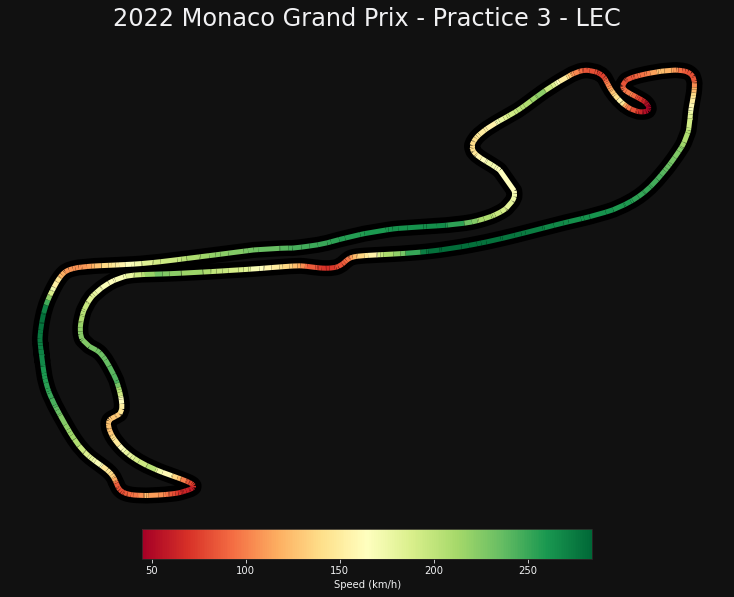

In [68]:
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(900*px, 600*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(lap_1['Speed'].min(), lap_1['Speed'].max())
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['Speed'])

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=lap_1['Speed'].min(), vmax=lap_1['Speed'].max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label='Speed (km/h)')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

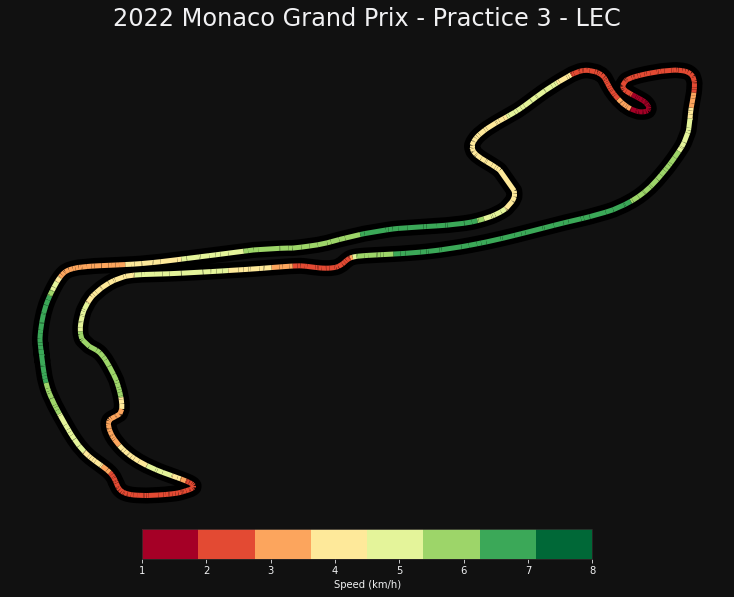

In [73]:
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(900*px, 600*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a norm to map from data points to colors
norm = plt.Normalize(1, colormap_gear.N+1)
lc = LineCollection(segments, cmap=colormap_gear, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['nGear'].to_numpy().astype(float))

# Merge all line segments together
line = ax.add_collection(lc)

# Create a color bar as a legend
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=1, vmax=8)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_gear, orientation="horizontal", label='Speed (km/h)')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()